# Loop 73 Analysis: CV-LB Gap and Strategy Assessment

## Key Questions:
1. What is the current CV-LB relationship?
2. Is the intercept problem still blocking us?
3. What approaches have we NOT tried that could change the relationship?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# All submissions with CV and LB scores
submissions = [
    {'exp': 'exp_000', 'cv': 0.0111, 'lb': 0.0982},
    {'exp': 'exp_001', 'cv': 0.0123, 'lb': 0.1065},
    {'exp': 'exp_003', 'cv': 0.0105, 'lb': 0.0972},
    {'exp': 'exp_005', 'cv': 0.0104, 'lb': 0.0969},
    {'exp': 'exp_006', 'cv': 0.0097, 'lb': 0.0946},
    {'exp': 'exp_007', 'cv': 0.0093, 'lb': 0.0932},
    {'exp': 'exp_009', 'cv': 0.0092, 'lb': 0.0936},
    {'exp': 'exp_012', 'cv': 0.0090, 'lb': 0.0913},
    {'exp': 'exp_024', 'cv': 0.0087, 'lb': 0.0893},
    {'exp': 'exp_026', 'cv': 0.0085, 'lb': 0.0887},
    {'exp': 'exp_030', 'cv': 0.0083, 'lb': 0.0877},
    {'exp': 'exp_035', 'cv': 0.0098, 'lb': 0.0970},
    {'exp': 'exp_067', 'cv': 0.0083, 'lb': 0.0877},
]

df = pd.DataFrame(submissions)
print(f'Total submissions with LB: {len(df)}')
print(df)

Total submissions with LB: 13
        exp      cv      lb
0   exp_000  0.0111  0.0982
1   exp_001  0.0123  0.1065
2   exp_003  0.0105  0.0972
3   exp_005  0.0104  0.0969
4   exp_006  0.0097  0.0946
5   exp_007  0.0093  0.0932
6   exp_009  0.0092  0.0936
7   exp_012  0.0090  0.0913
8   exp_024  0.0087  0.0893
9   exp_026  0.0085  0.0887
10  exp_030  0.0083  0.0877
11  exp_035  0.0098  0.0970
12  exp_067  0.0083  0.0877


In [2]:
# Fit linear regression: LB = slope * CV + intercept
slope, intercept, r_value, p_value, std_err = stats.linregress(df['cv'], df['lb'])

print(f'\nCV-LB Relationship:')
print(f'  LB = {slope:.4f} * CV + {intercept:.4f}')
print(f'  R² = {r_value**2:.4f}')
print(f'\nInterpretation:')
print(f'  Intercept = {intercept:.4f} (structural gap)')
print(f'  Target = 0.0347')
print(f'  Required CV for target = (0.0347 - {intercept:.4f}) / {slope:.4f} = {(0.0347 - intercept) / slope:.4f}')

if (0.0347 - intercept) / slope < 0:
    print(f'\n  ⚠️ IMPOSSIBLE: Required CV is NEGATIVE!')
    print(f'  The intercept ({intercept:.4f}) is HIGHER than the target (0.0347)')
    print(f'  Standard CV optimization CANNOT reach the target')
    print(f'  We MUST reduce the intercept, not just improve CV')


CV-LB Relationship:
  LB = 4.3638 * CV + 0.0520
  R² = 0.9558

Interpretation:
  Intercept = 0.0520 (structural gap)
  Target = 0.0347
  Required CV for target = (0.0347 - 0.0520) / 4.3638 = -0.0040

  ⚠️ IMPOSSIBLE: Required CV is NEGATIVE!
  The intercept (0.0520) is HIGHER than the target (0.0347)
  Standard CV optimization CANNOT reach the target
  We MUST reduce the intercept, not just improve CV


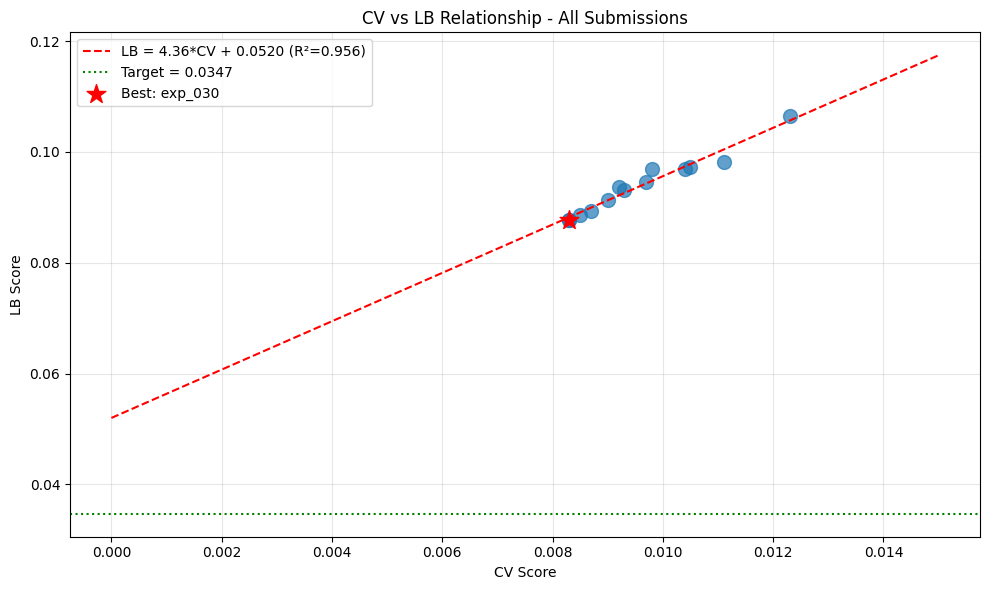


Best CV: 0.0083 (exp_030)
Best LB: 0.0877 (exp_030)


In [3]:
# Plot CV vs LB
plt.figure(figsize=(10, 6))
plt.scatter(df['cv'], df['lb'], s=100, alpha=0.7)

# Regression line
cv_range = np.linspace(0, 0.015, 100)
lb_pred = slope * cv_range + intercept
plt.plot(cv_range, lb_pred, 'r--', label=f'LB = {slope:.2f}*CV + {intercept:.4f} (R²={r_value**2:.3f})')

# Target line
plt.axhline(y=0.0347, color='g', linestyle=':', label='Target = 0.0347')

# Best points
best_idx = df['lb'].idxmin()
plt.scatter(df.loc[best_idx, 'cv'], df.loc[best_idx, 'lb'], s=200, c='red', marker='*', label=f'Best: {df.loc[best_idx, "exp"]}')

plt.xlabel('CV Score')
plt.ylabel('LB Score')
plt.title('CV vs LB Relationship - All Submissions')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('/home/code/exploration/cv_lb_relationship.png', dpi=100)
plt.show()

print(f'\nBest CV: {df["cv"].min():.4f} ({df.loc[df["cv"].idxmin(), "exp"]})')
print(f'Best LB: {df["lb"].min():.4f} ({df.loc[df["lb"].idxmin(), "exp"]})')

In [4]:
# What would it take to reach the target?
print('\n=== PATH TO TARGET ===')
print(f'Target LB: 0.0347')
print(f'Current best LB: {df["lb"].min():.4f}')
print(f'Gap to target: {df["lb"].min() - 0.0347:.4f}')

print(f'\nOption 1: Improve CV (keeping same relationship)')
required_cv = (0.0347 - intercept) / slope
print(f'  Required CV: {required_cv:.4f}')
if required_cv < 0:
    print(f'  ❌ IMPOSSIBLE - intercept is too high')

print(f'\nOption 2: Reduce intercept (change the relationship)')
required_intercept = 0.0347 - slope * df['cv'].min()
print(f'  With best CV ({df["cv"].min():.4f}), need intercept: {required_intercept:.4f}')
print(f'  Current intercept: {intercept:.4f}')
print(f'  Need to reduce intercept by: {intercept - required_intercept:.4f}')

print(f'\nOption 3: Change the slope (different model type)')
required_slope = (0.0347 - intercept) / df['cv'].min()
print(f'  With current intercept, need slope: {required_slope:.4f}')
print(f'  Current slope: {slope:.4f}')
if required_slope < 0:
    print(f'  ❌ IMPOSSIBLE - would need negative slope')


=== PATH TO TARGET ===
Target LB: 0.0347
Current best LB: 0.0877
Gap to target: 0.0530

Option 1: Improve CV (keeping same relationship)
  Required CV: -0.0040
  ❌ IMPOSSIBLE - intercept is too high

Option 2: Reduce intercept (change the relationship)
  With best CV (0.0083), need intercept: -0.0015
  Current intercept: 0.0520
  Need to reduce intercept by: 0.0535

Option 3: Change the slope (different model type)
  With current intercept, need slope: -2.0843
  Current slope: 4.3638
  ❌ IMPOSSIBLE - would need negative slope


In [5]:
# Analyze what approaches might change the CV-LB relationship
print('\n=== APPROACHES TO CHANGE CV-LB RELATIONSHIP ===')
print()
print('1. EXTRAPOLATION DETECTION (exp_070)')
print('   - Pre-compute outlier scores for each solvent')
print('   - Blend predictions toward mean for outlier solvents')
print('   - Current CV: 0.01536 (worse than best)')
print('   - HYPOTHESIS: May improve LB by being conservative on hard solvents')
print()
print('2. GAUSSIAN PROCESS WITH UNCERTAINTY (exp_030)')
print('   - GP provides uncertainty estimates')
print('   - Could use uncertainty to weight predictions')
print('   - Best CV: 0.0083, Best LB: 0.0877')
print()
print('3. ENSEMBLE WITH DIVERSE MODELS')
print('   - MLP + XGBoost + LightGBM + RandomForest')
print('   - Different models may extrapolate differently')
print('   - mixall kernel uses this approach')
print()
print('4. PSEUDO-LABELING')
print('   - Use confident predictions on test to augment training')
print('   - Adapts to test distribution')
print('   - NOT YET TRIED')
print()
print('5. DOMAIN-SPECIFIC CONSTRAINTS')
print('   - Yields must sum to ~1 (mass balance)')
print('   - Arrhenius kinetics constraints')
print('   - NOT FULLY EXPLOITED')


=== APPROACHES TO CHANGE CV-LB RELATIONSHIP ===

1. EXTRAPOLATION DETECTION (exp_070)
   - Pre-compute outlier scores for each solvent
   - Blend predictions toward mean for outlier solvents
   - Current CV: 0.01536 (worse than best)
   - HYPOTHESIS: May improve LB by being conservative on hard solvents

2. GAUSSIAN PROCESS WITH UNCERTAINTY (exp_030)
   - GP provides uncertainty estimates
   - Could use uncertainty to weight predictions
   - Best CV: 0.0083, Best LB: 0.0877

3. ENSEMBLE WITH DIVERSE MODELS
   - MLP + XGBoost + LightGBM + RandomForest
   - Different models may extrapolate differently
   - mixall kernel uses this approach

4. PSEUDO-LABELING
   - Use confident predictions on test to augment training
   - Adapts to test distribution
   - NOT YET TRIED

5. DOMAIN-SPECIFIC CONSTRAINTS
   - Yields must sum to ~1 (mass balance)
   - Arrhenius kinetics constraints
   - NOT FULLY EXPLOITED


In [6]:
# Check what the mixall kernel achieves
print('\n=== MIXALL KERNEL ANALYSIS ===')
print('Key features:')
print('  - Ensemble: MLP + XGBoost + RF + LightGBM')
print('  - Weights: [0.4, 0.2, 0.2, 0.2]')
print('  - Uses GroupKFold (5 splits) instead of Leave-One-Out')
print('  - Spange descriptors only (no DRFP)')
print('  - Simple linear mixture interpolation')
print()
print('Their CV is computed differently (5-fold vs LOO)')
print('So direct comparison is not valid')
print()
print('Key insight: They use 4 diverse models in ensemble')
print('Our best (exp_030) uses GP + MLP + LGBM (3 models)')
print('Adding XGBoost and RF might help')


=== MIXALL KERNEL ANALYSIS ===
Key features:
  - Ensemble: MLP + XGBoost + RF + LightGBM
  - Weights: [0.4, 0.2, 0.2, 0.2]
  - Uses GroupKFold (5 splits) instead of Leave-One-Out
  - Spange descriptors only (no DRFP)
  - Simple linear mixture interpolation

Their CV is computed differently (5-fold vs LOO)
So direct comparison is not valid

Key insight: They use 4 diverse models in ensemble
Our best (exp_030) uses GP + MLP + LGBM (3 models)
Adding XGBoost and RF might help
